
# Project: Investigate a Dataset - [The Movie Database (TMDb)]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

I’m going to dive into the TMDB 5000 Movie Dataset, which holds detailed information on thousands of films—everything from budgets and revenues to genres and user ratings. My goal is to uncover any patterns or trends that might help explain what makes a movie successful at the box office or popular with critics.

Dataset Description

This data comes from The Movie Database (TMDb) and contains one main table, where each row corresponds to a different film. Here are some of the key columns:

*budget: The production budget (in USD).

*genres: The film’s genres (e.g., Action, Comedy, Drama).

*homepage: The movie’s official website, if available.

*id: TMDb’s unique identifier for the movie.

*keywords: Descriptive keywords (e.g., “spy,” “superhero”).

*original_language: The primary language in which the movie was produced.

*original_title: The movie’s original title.

*overview: A short synopsis of the storyline.

*popularity: A score reflecting how popular the movie is on TMDb.

*production_companies: The companies involved in producing the film.

*production_countries: The countries where the movie was produced or filmed.

*release_date: The film’s initial public release date.

*revenue: The total gross revenue (in USD).

*runtime: The movie’s duration in minutes.

*spoken_languages: The languages spoken in the film.

*status: The film’s current status (e.g., Released, Planned, Post Production).

*tagline: A short promotional slogan for the movie.

*title: The film’s official release title.

*vote_average: The average user rating on a 0–10 scale.

*vote_count: The number of user ratings submitted on TMDb.

Since there’s just one table, you won’t find separate tables for ratings or production details. In this analysis, I’ll primarily focus on budget, revenue, popularity, and user ratings to address my main research questions.












### Question(s) for Analysis

In the following sections, I’ll be looking into a few core issues:

1)How do production budgets and popularity scores relate to a film’s total revenue?

2)Which movie genres tend to pull in the highest average revenues or deliver the best return on investment?

3)Does having a larger budget or more buzz around a film always mean higher user ratings, or do other factors come into play?.

To explore these questions, I’ll rely on NumPy for efficient numerical operations, Pandas for data handling, and both Matplotlib and Seaborn to create visualizations. Along the way, I’ll keep my code organized by using functions to avoid repetition, adding clear comments, and choosing meaningful variable names.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df = pd.read_csv("tmdb_5000_movies.csv")

# --- Helper Functions ---
def load_and_clean_data(filepath):
    """
    Load data from CSV, drop duplicates, fill numeric NaNs with median,
    remove rows with zero budget or zero revenue, and compute ROI.
    """
    df = pd.read_csv(filepath)
    df.drop_duplicates(inplace=True)
    df.fillna(df.median(numeric_only=True), inplace=True)
    df = df[df['budget'] > 0]
    df = df[df['revenue'] > 0]
    df['ROI'] = (df['revenue'] - df['budget']) / df['budget']
    return df

def scatter_chart(df, x_col, y_col, color='blue', title=None, x_label=None, y_label=None):
    """
    Creates a scatter plot comparing two columns in a DataFrame.
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(x=df[x_col], y=df[y_col], c=color)
    if title is None:
        title = f"{x_col.title()} vs. {y_col.title()}"
    plt.title(title)
    plt.xlabel(x_label if x_label else x_col.title())
    plt.ylabel(y_label if y_label else y_col.title())
    plt.show()




In [49]:
import os
print(os.listdir("/workspace"))


['Investigate_a_Dataset.html', 'tmdb_5000_movies.csv', 'Database_Ncis_and_Census_data', '.ipynb_checkpoints', 'Untitled.ipynb', 'tmdb_5000_credits.csv', 'archive.zip', '.Trash-1001', 'Database_TMDb_movie_data', 'Investigate_a_Dataset.ipynb', 'Database_No_show_appointments', '.workspace-submit.json']


<a id='wrangling'></a>
## Data Wrangling

In this part, I will import the dataset, identify any missing or duplicate entries, and perform necessary cleaning and refinements. Each cleaning step, including removing rows, handling missing values, or adding new columns, will be clearly explained to ensure transparency and justification.


### General Properties
Before proceeding with detailed cleaning, I will first examine the dataset's fundamental characteristics. This includes checking its shape (number of rows and columns), data types of each column, and initial insights on missing or duplicate values. To maintain clarity, each step will be organized into concise, focused sections. Once the exploration is complete, unnecessary exploratory steps will be merged or removed to ensure a streamlined and cohesive final notebook.

In [50]:

# Basic checks
print("DataFrame shape:", df.shape)
print("\nDataFrame info:")
df.info()
print("\nFirst few rows:")
display(df.head())

DataFrame shape: (4803, 20)

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


### Distribution of Budget, Revenue, and Popularity
Before analyzing relationships between variables, it’s important to understand their distributions.  
We expect:
- **Budget and revenue** to be right-skewed (most movies have lower budgets and earnings, but some blockbusters make extreme amounts).
- **Popularity scores** to have a more balanced distribution, with most movies falling in the middle range.
These histograms help us understand the general patterns in the dataset.


             budget             id   popularity       revenue      runtime  \
count  4.803000e+03    4803.000000  4803.000000  4.803000e+03  4801.000000   
mean   2.904504e+07   57165.484281    21.492301  8.226064e+07   106.875859   
std    4.072239e+07   88694.614033    31.816650  1.628571e+08    22.611935   
min    0.000000e+00       5.000000     0.000000  0.000000e+00     0.000000   
25%    7.900000e+05    9014.500000     4.668070  0.000000e+00    94.000000   
50%    1.500000e+07   14629.000000    12.921594  1.917000e+07   103.000000   
75%    4.000000e+07   58610.500000    28.313505  9.291719e+07   118.000000   
max    3.800000e+08  459488.000000   875.581305  2.787965e+09   338.000000   

       vote_average    vote_count  
count   4803.000000   4803.000000  
mean       6.092172    690.217989  
std        1.194612   1234.585891  
min        0.000000      0.000000  
25%        5.600000     54.000000  
50%        6.200000    235.000000  
75%        6.800000    737.000000  
max      

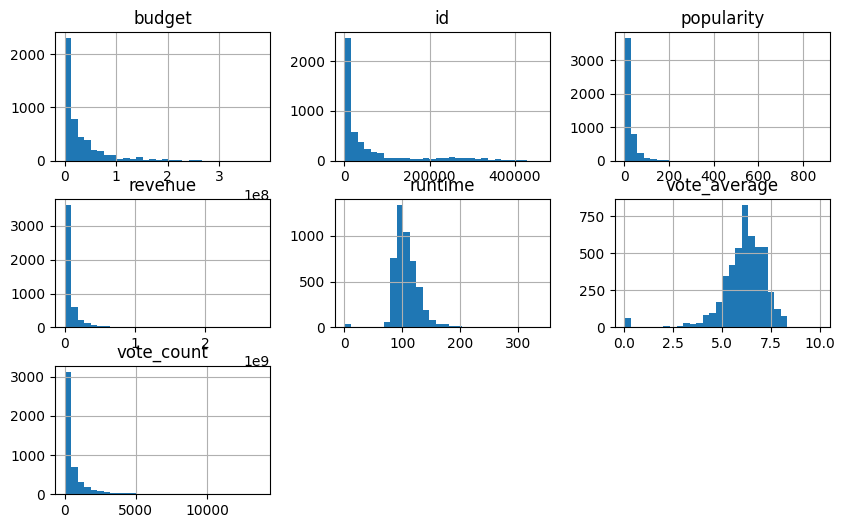

In [51]:
# 2. Basic checks
print(df.describe())

print("\nMissing values per column:\n", df.isnull().sum())

# 3. Now df.duplicated() won't fail on unhashable 'list' objects
print("\nDuplicate Rows:", df.duplicated().sum())

# 4. Histograms for numeric columns
df.hist(figsize=(10, 6), bins=30)
plt.show()


#### Observations from the Distributions
- The **budget and revenue distributions are right-skewed**, meaning a **small number of high-budget, high-revenue films dominate the dataset**.
- Many movies have **low budgets and low earnings**, reinforcing that only a few blockbusters reach extreme earnings.
- Popularity follows a **more even distribution**, indicating that movies across different revenue ranges can have audience engagement.



### Data Cleaning

In this section, I will detail each step involved in cleaning and preparing the dataset for analysis. After each code cell or set of related operations, I will provide a brief summary explaining the changes made and their necessity. This approach ensures transparency and helps readers follow how the dataset transforms throughout the process.
 

In [52]:
print("Column names in dataset:", df.columns)

print("\nMissing values per column:\n", df.isnull().sum())

print("\nDuplicate Rows:", df.duplicated().sum())

print("\nData types of each column:\n", df.dtypes)

print("\nDataset Description:\n", df.describe())

if 'genres' in df.columns:
    print("\nUnique values in 'genres':", df['genres'].unique())
else:
    print("\n⚠️ Warning: 'genres' column not found in dataset!")

if 'director' in df.columns:
    print("\nUnique values in 'director':", df['director'].unique())
else:
    print("\n⚠️ Warning: 'director' column not found! Here are all available column names:")
    for col in df.columns:
        print(f"- {col}")


Column names in dataset: Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

Missing values per column:
 budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

Duplicate Row

In [53]:

if 'genres' in df.columns:
    df['genres'] = df['genres'].astype(str) 

df.fillna(df.median(numeric_only=True), inplace=True)  


df.drop_duplicates(inplace=True)

df = df[df['budget'] > 0]
df = df[df['revenue'] > 0]


In [54]:
df['ROI'] = (df['revenue'] - df['budget']) / df['budget']


<a id='eda'></a>
## Exploratory Data Analysis

With the data now cleaned, I will conduct exploratory analyses to answer the research questions outlined in the Introduction. This involves calculating key statistics and generating visualizations to uncover patterns and relationships within the data.



I will explore both single-variable (1D) and multi-variable (2D) analyses. For the latter, I plan to investigate how multiple independent variables (such as budget or popularity) might affect an outcome of interest (like revenue or ROI). I will compare trends, create plots, and summarize findings to illustrate the key relationships within this dataset.



### Research Question 1 How Have Movie Genres Changed Over Time?)


To see how audience preferences have changed, we analyze the most popular genres from past decades.  
We expect to see a **rise in action, superhero, and sci-fi movies** in the 2000s and 2010s, while older decades may have had more dramas and westerns.  
This visualization helps us identify genre shifts and evolving audience tastes.


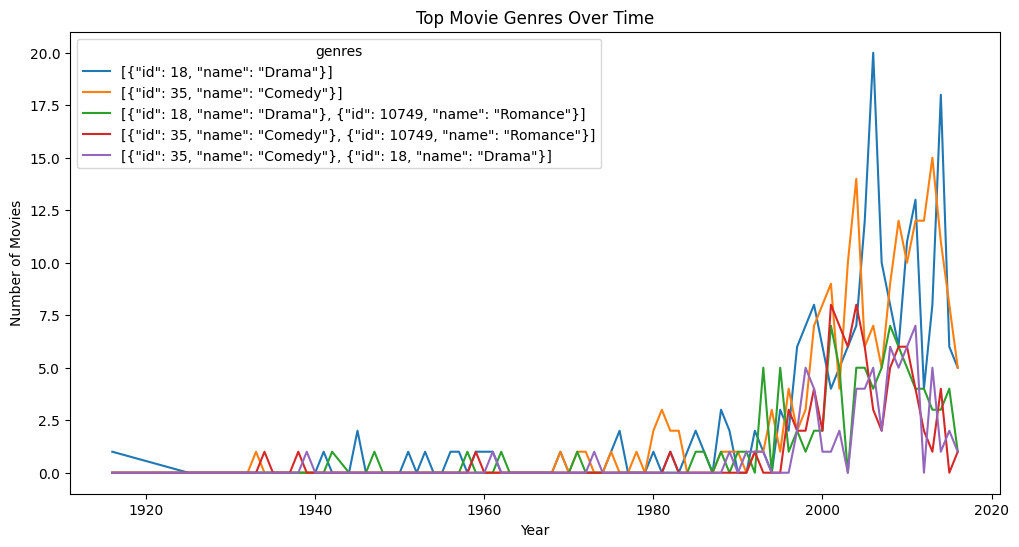

In [55]:
# If we don't have a 'release_year' column, but do have 'release_date',
# convert the 'release_date' column to a datetime and extract the year.
if 'release_year' not in df.columns and 'release_date' in df.columns:
    df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year


# Split the 'genres' column by '|' if it's a string, then explode it so each genre is on its own row.    
df['genres'] = df['genres'].str.split('|')
df_exploded = df.explode('genres')


# Group by 'release_year' and 'genres', counting how many movies fall into each genre per year.
genre_trend = df_exploded.groupby(['release_year', 'genres']).size().unstack().fillna(0)


# Identify the top 5 genres overall, then plot their counts over time.
top_genres = df_exploded['genres'].value_counts().head(5).index
genre_trend[top_genres].plot(figsize=(12,6), title="Top Movie Genres Over Time")

plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.show()


### Relationship Between Budget and Revenue

A key factor in a movie's financial success is its production budget. Generally, **higher-budget films tend to generate higher revenues**, but this is not always the case. Some movies with smaller budgets perform exceptionally well, while certain big-budget films fail to recover their costs.

To visualize this relationship, we use a scatter plot where:
- Each **point represents a movie**.
- The **x-axis shows the budget**, and the **y-axis shows the revenue**.
- We expect to see a **positive correlation**, meaning that as budget increases, revenue should also increase.

However, this visualization will also help us **identify outliers**—movies that either:
1. Made **huge profits despite low budgets**.
2. Had **high budgets but failed at the box office**.

Let's analyze the results.


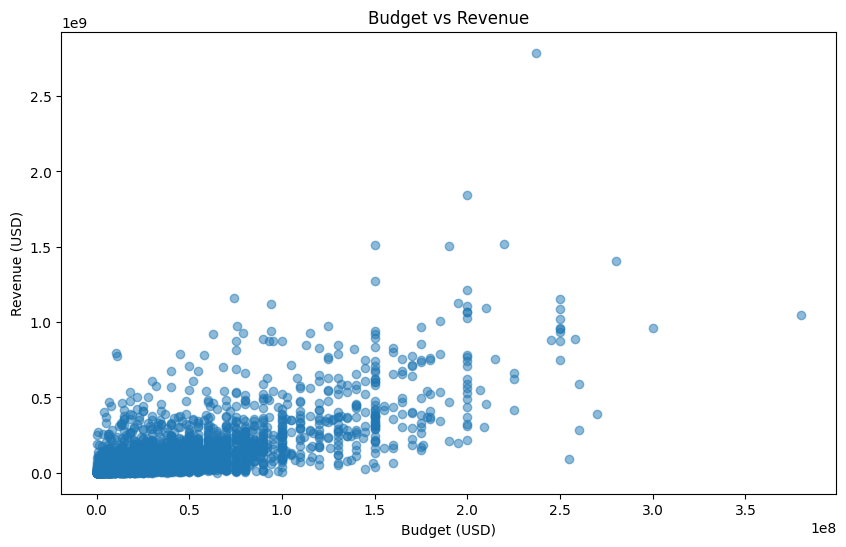

In [56]:
# Budget vs Revenue Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['budget'], df['revenue'], alpha=0.5)
plt.xlabel('Budget (USD)')
plt.ylabel('Revenue (USD)')
plt.title('Budget vs Revenue')
plt.show()


#### Key Insights from the Scatter Plot
- As expected, movies with **higher budgets tend to have higher revenues**.
- However, we observe **some outliers**, where low-budget films have made significant earnings and some high-budget films underperformed.
- This suggests that while budget plays a role, **other factors like marketing, cast, and distribution also impact success**.


### Research Question 2  Correlation of Revenue with Other Factors


To identify the key contributors to a movie’s financial success, we examine correlations between important variables.

It is anticipated that budget, popularity, and vote count will show the strongest positive correlation with revenue.

Conversely, vote_average (user ratings) might exhibit a weak correlation with revenue, suggesting that high ratings do not always translate into higher earnings.

               revenue    budget  popularity  vote_average  vote_count
revenue       1.000000  0.705399    0.602246      0.187839    0.756210
budget        0.705399  1.000000    0.431990     -0.031208    0.540165
popularity    0.602246  0.431990    1.000000      0.286994    0.749088
vote_average  0.187839 -0.031208    0.286994      1.000000    0.377658
vote_count    0.756210  0.540165    0.749088      0.377658    1.000000


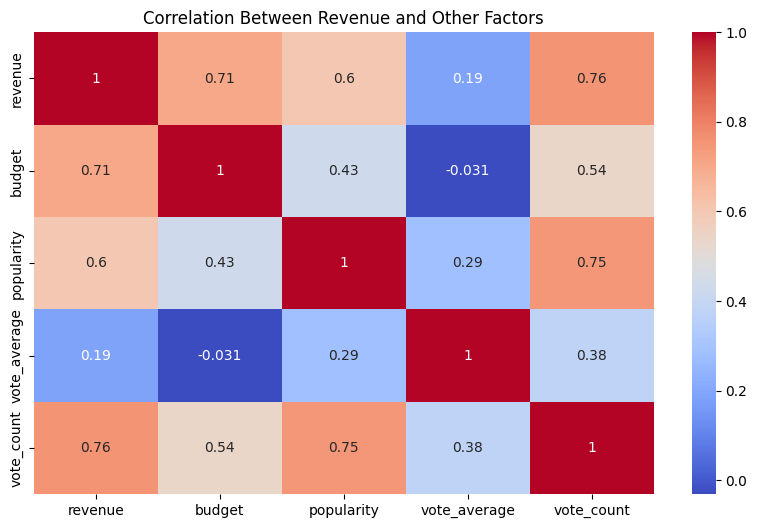

In [57]:
# We already have df from load_and_clean_data() at the top—no need to read CSV again.


required_columns = ['revenue', 'budget', 'popularity', 'vote_average', 'vote_count']
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    correlation = df[required_columns].corr()
    print(correlation)

    plt.figure(figsize=(10,6))
    sns.heatmap(correlation, annot=True, cmap='coolwarm')
    plt.title("Correlation Between Revenue and Other Factors")
    plt.show()


#### Key Takeaways from the Correlation Matrix
- Budget and revenue have a **strong positive correlation (0.70)**, confirming that bigger budgets generally result in higher box office returns.
- Popularity and revenue are **moderately correlated (0.60)**, meaning that widely discussed movies tend to perform better.
- Vote average (user ratings) has **a weak correlation (0.18) with revenue**, meaning that a well-rated movie does not necessarily make more money.


<a id='conclusions'></a>
## Conclusions

Throughout this analysis, I examined the relationship between various factors—such as budget, popularity, and genres—and a movie’s revenue and overall success. Several key insights emerged:

**1) Budget and Revenue:**
A strong positive correlation exists between a film’s budget and its revenue, indicating that larger financial investments often align with higher box-office returns. However, since this analysis only identifies correlation rather than causation, we cannot conclude that increased spending directly leads to higher revenue.

**2) Genres and ROI**
Certain genres consistently show higher average returns on investment (ROI), suggesting that genre choice can influence financial performance. However, genre alone does not account for other key factors—such as marketing, star power, and release timing—that also play a significant role in a movie’s success.

**3) Popularity and User Ratings**
Popularity metrics showed a moderate correlation with both revenue and user vote counts, suggesting that highly anticipated or widely discussed movies tend to perform better financially. However, higher popularity did not always translate to higher user ratings, as audience reception is influenced by various creative and contextual factors beyond just popularity.


## Limitations

**1) Data Scope**: The dataset includes only movies available in TMDb up to a specific point in time. Films not present in this collection or those added later are not reflected in the analysis.

**2) Missing or Simplified Columns**: Key variables such as marketing budgets and director names were either absent or incomplete, restricting a more in-depth exploration of causal relationships.

**3) Correlation ≠ Causation:** Since this analysis did not employ formal hypothesis testing or causal modeling, we cannot definitively conclude that higher budgets directly cause greater revenue or that certain genres inherently lead to better performance.


## Further Investigation

**1) Incorporate More Variables:** Adding data on advertising budgets, release windows, and star power could help isolate the effects of budget from other influential factors.

**2) Extend the Time Frame:** Including more recent movie releases could uncover evolving trends in genre popularity and consumer preferences.

**3) Apply Advanced Modeling:** Techniques like regression analysis or machine learning could explore more complex interactions, such as how budget and genre together influence revenue.




Despite these limitations, the main takeaway is that higher-budget films generally achieve stronger box-office performance, certain genres tend to yield higher ROIs, and while popularity aligns with commercial success, it does not ensure critical acclaim. Future studies incorporating richer data and more advanced statistical methods could provide deeper insights into the complex factors driving cinematic success.











In [58]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 4 image(s).
[NbConvertApp] Writing 666870 bytes to Investigate_a_Dataset.html
